In [1]:
import ROOT as root
import root_pandas as rp
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from tqdm.notebook import tqdm
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (11, 10),
          'axes.grid': False,
          'grid.linestyle': '-',
          'grid.alpha': 0.2,
          'lines.markersize': 5.0,
          'xtick.minor.visible': True,
          'xtick.direction': 'in',
          'xtick.major.size': 10.0,
          'xtick.minor.size': 5.0,
          'xtick.top': True,
          'ytick.minor.visible': True,
          'ytick.direction': 'in',
          'ytick.major.size': 10.0,
          'ytick.minor.size': 5.0,
          'ytick.right': True,
          'errorbar.capsize': 0.0,
          'figure.max_open_warning': 50
})

Welcome to JupyROOT 6.24/06


In [2]:
path = '~/belle-2-napoli-hardware/Simulazione Cristallo/Simulazione_Gaudino/B4c/build'

In [3]:
df = {}

In [4]:
for material in ['CsI']:
    df[material] = {}

In [10]:
energies = ['50','100','200','300','400','500']

In [11]:
for energy in energies:
    df[material][energy] = rp.read_root(f'{path}/elettroni_{energy}.root', key = 'calorimeter')
    df[material][energy].to_parquet(f'{path}/elettroni_{energy}.parq', compression='GZIP')

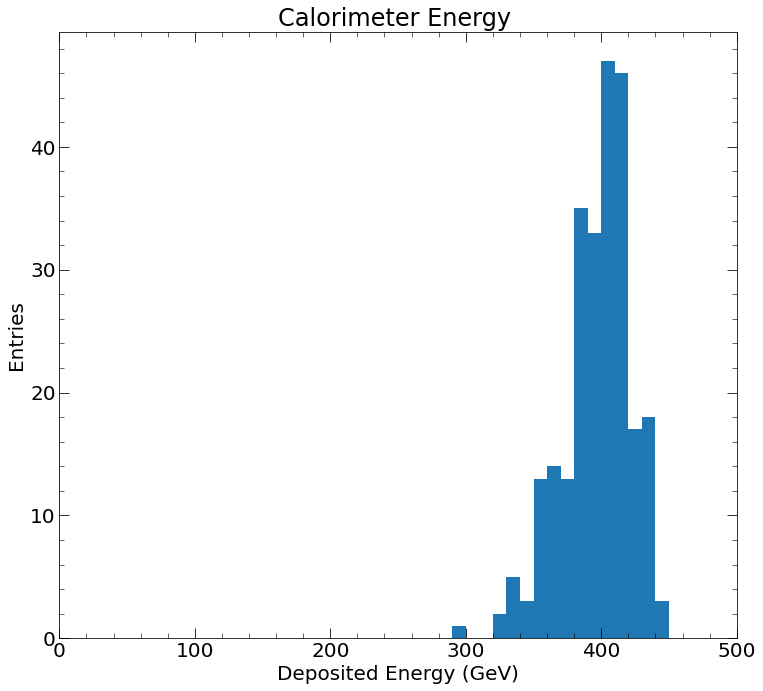

In [7]:
plt.hist(df[material][energy]['E_Calor'], bins = 50, range = (0,500) )
plt.xlim(0,500)
plt.xlabel('Deposited Energy (GeV)')
plt.ylabel('Entries')
plt.title('Calorimeter Energy ')
plt.tight_layout()

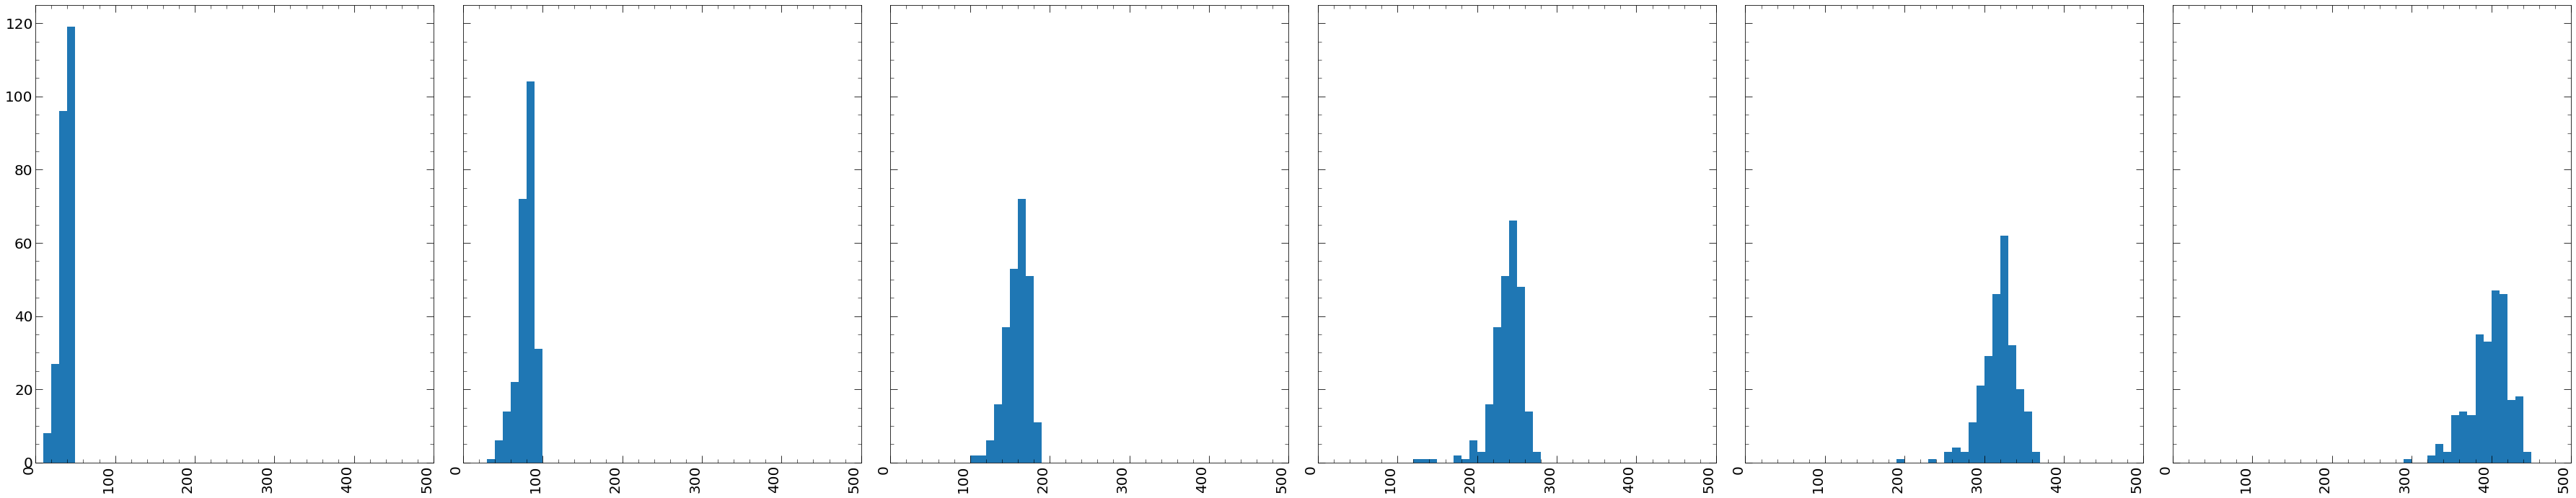

In [59]:
fig, ax = plt.subplots(nrows=1, 
           ncols=6, 
           figsize=(50, 10),
           sharey=True
          )
plt.subplots_adjust(wspace=0.001,hspace = 0.001)
fig.autofmt_xdate(rotation=90)
means = {}
stds = {}
for index in range(len(energies)):
   # i = int(index/5)
    #j = int(index%5)
    #print(index)
    ax[index].hist(df[material][energies[index]]['E_Calor'], bins = 50, range = (0,500))
    ax[index].set_xlim(0,500)
    means[int(energies[index])] = df[material][energies[index]]['E_Calor'].mean()
    stds[int(energies[index])] = df[material][energies[index]]['E_Calor'].std()
    #ax[index].set_title(f'{mean-int(energies[index])}')
    #ax[i][j].xlabel('Deposited Energy (GeV)')
    #ax[i][j].sety_label('Entries')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Incident Energy [MeV]')

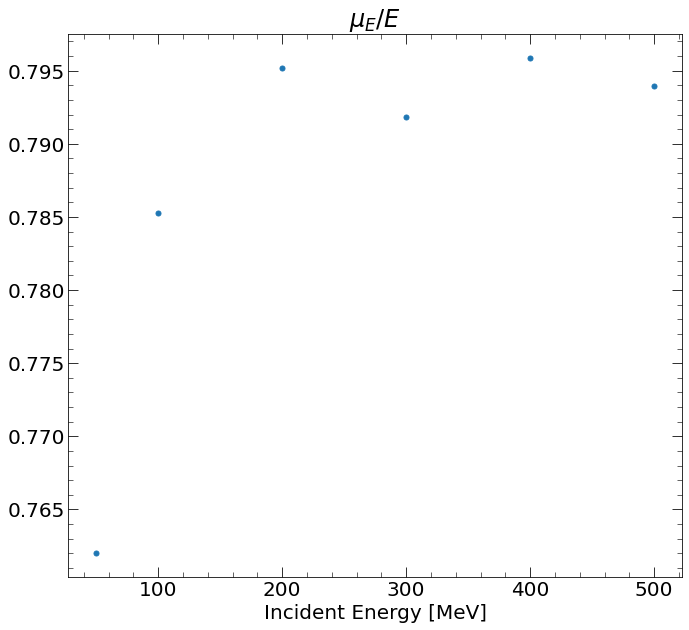

In [77]:
plt.scatter(means.keys(), np.array(list(means.values()))/np.array(list(means.keys())))
plt.title('$\mu_E/E$')
plt.xlabel('Incident Energy [MeV]')

Text(0.5, 0, 'Incident Energy [MeV]')

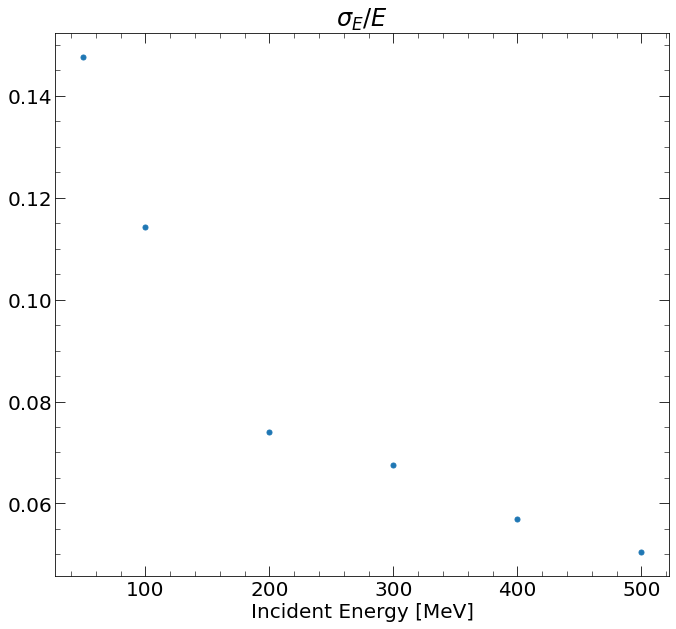

In [78]:
plt.scatter(means.keys(), np.array(list(stds.values()))/np.array(list(means.keys())))
plt.title('$\sigma_E/E$')
plt.xlabel('Incident Energy [MeV]')